**General tips for computing and plotting discrete fourier transforms (DFT)**

- Let g(t) be some time signal that’s sampled at $dt$ to get a discrete array/list `g = [ … ]`
- You don’t need to code your own DFT, use numpy:  `A = numpy.fft.fft(g) * dt`
- You should also use `numpy.fft.fftshift( A )` to shift the fft output such that the 0-frequency component is centered (see why here https://docs.scipy.org/doc/numpy/reference/routines.fft.html#background-information) which you probably want when plotting
- You can use `f_axis = numpy.fft.fftshift( numpy.fft.fftfreq(len(g), dt) )` to create the frequency axis for plotting the shifted spectrum
- Keep in mind the fft output is in general complex, so to compare two fourier transforms (e.g. DFT vs CFT) you should compare either the real and imaginary parts ($z = x + i y$), or the phase and amplitude ($z = r e^{i\theta}$ ). Amplitude plots are most useful for this lab, show all 4 aspects though if you want.
- Note numpy fft assumes the time signal starts at $t = 0$, if yours doesn’t you should center it at zero. If you don’t then the complex components (x and y, or phase) will be off, but the amplitude should not change (why? analytically, recall that axis shifts in either domain are equivalent to complex exponential scaling, which has amplitude 1, in the other domain).
- If your time signal g is centered at zero, a hack to ‘rotate it’ to start at zero (and then take the fft and fftshift that) is to do: `fftshift( fft( ifftshift(g) ) )` (you may see mention of this online)

# Fourier transform of Gaussian Functions (6 pts)

A common function used for the convolution of time series data is the Gaussian function

$$  g(t) = \frac{1}{\sqrt{\pi} t_H} e^{-(t/t_H)^2}, $$

where $t_H$ is the half duration.

 1. Plot $g(t)$ for $t_H = 5$ and $t_H = 15$ sec on the same graph with domain $[-50, 50]$ and $dt=10^{-3}$.
 2. The analytical formula for the Fourier transform of $g(t)$ is

    $$ G(\omega) = e^\frac{-\omega^2 t_H^2}{4}. $$

    Compute the discrete Fourier transform (DFT) for both sampled $g(t)$
    time series, and compare them to the analytical $G(\omega)$
    for both $t_H$'s on the same graph.

    __Hints__: 
    - As numpy fft assumes signal starts from time 0, you can
    use the shift property of Fourier transform to first shift the $g(t)$
    to start from zero, and after `fftshift(fft())` operations, multiply
    the spectrum by complex exponential sinusoid function.
    - You need to sample the theoretical curve $G(w)$ with `w_axis = 2*pi*f_axis`, or else rewrite it as $G(f=\frac{w}{2\pi})$ if you'd rather sample it with `f_axis`
    - As a guide (so you can be confident of your fft utilization for the remainder of the lab), we expect that the amplitudes (use `numpy.abs(…)`) of the discrete FT and the continuous FT essentially match. The phase won’t necessarily match.
 3. Comment on the effect of filtering a general input time function $f(t)$ by $g(t)$
    (i.e. convolution of $f(t)$ with $g(t)$), and explain the difference in filtered output
    after applying Gaussian functions with $t_H = 5$ or $15$ secs.
 4. Comment on how this is related to the time-frequency uncertainty principle (a signal cannot
    be infinitesimally sharp both in time and frequency).

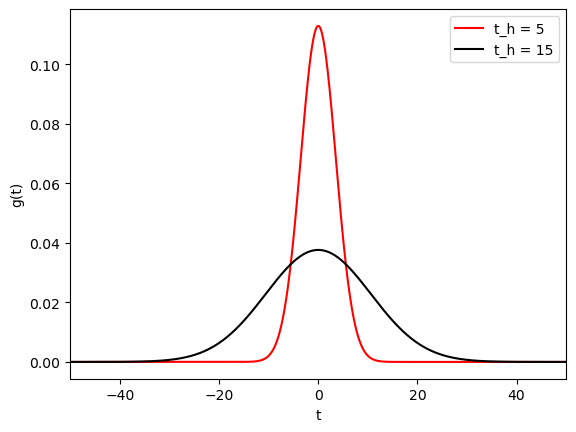

In [287]:
##part 1
#collaborators q1: none

import matplotlib.pyplot as plt
import numpy as np

dt = 10**(-3)

def g(T, dt):
    t = np.arange(-50,50,dt)
    g = 1/(np.sqrt(np.pi)*T)*np.exp(-(t/T)**2)
    return g
t5 = np.arange(-50,50,dt)

plt.plot(t5, g(5,dt), 'red', label = 't_h = 5')
plt.plot(t5, g(15,dt), 'black', label = 't_h = 15')
plt.xlim(-50,50)
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()


Text(0.5, 1.0, 'T_h = 15')

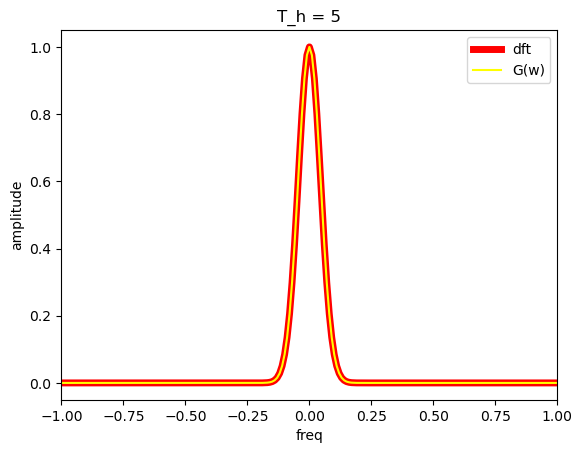

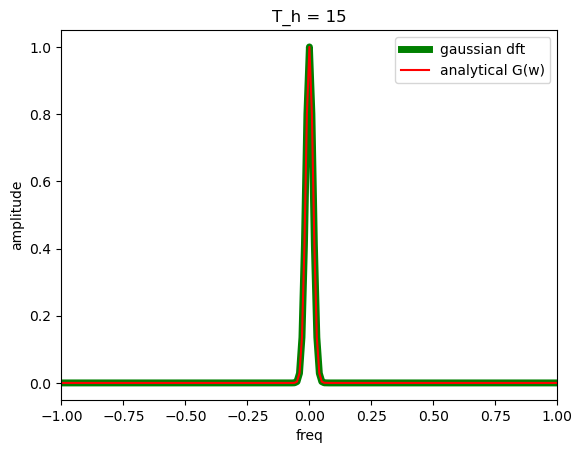

In [288]:
##part 2
#computing g with T_h =5,15
g5 = g(5,dt)
g15 = g(15,dt)

#computing DFT of g
g5_dft = np.fft.fft(g5)*dt
g15_dft = np.fft.fft(g15)*dt

#shifting g #*np.exp(1j*2*np.pi*g5f*t)
g5shift = np.fft.fftshift(g5_dft)
g15shift = np.fft.fftshift(g15_dft)

amp5 = np.abs(g5shift)

amp15 = np.abs(g15shift)


#g's frequency
g5f = np.fft.fftfreq(len(g5), dt)
g15f = np.fft.fftfreq(len(g15), dt)


#finding g_axis to use for plotting
g5_axis = np.fft.fftshift( g5f )
g15_axis = np.fft.fftshift( g15f )


t = np.arange(-50,50,dt)


#omega for analytical G

w5 = 2*np.pi*g5_axis
w15 = 2*np.pi*g15_axis

def G(w,T):
    G = np.exp((-w**2 * T**2)/4)
    return G

plt.plot(g5_axis,amp5,'red', label = 'dft', lw=5)
plt.plot(g5_axis,G(w5,5),'yellow', label = 'G(w)')
plt.legend()
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(-1,1)
plt.title('T_h = 5')

plt.figure()
plt.plot(g15_axis,amp15, 'green', label = 'gaussian dft', lw=5)
plt.plot(g15_axis,G(w15,15), 'red', label = 'analytical G(w)')
plt.xlim(-1,1)
plt.legend()
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.title('T_h = 15')


## part 3
Filtering makes the function generally smoother so when t_h = 5, the variance is smaller than when its 15s.

## part 4
For the signal to be 'sharp' in time then it can't be sharp in frequency as well. Hence the increase in variance with the increase in time because we are smoothing out the function i.e the frequency.

# Fourier transform of Window Functions (6 pts)

A continuous time signal $f(t)$ can be truncated into a signal of finite length
$T$ by window functions $b(t)$:

$$ g(t) = f(t) b(t) $$

Typical window functions include:

 * Boxcar function
    $$b(t) =
    \begin{cases}
    1 & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$
 * Hann window
    $$b(t) =
    \begin{cases}
    \frac{1}{2} \left( 1 - \cos \frac{2 \pi t}{T} \right) & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$

Now let $T = 10$ seconds, and sample both window functions by $\Delta t = 0.01$ seconds:

 1. Plot both window functions on the same graph.
 2. Calculate the Fourier transform of both functions by numpy `fft()`. Pay extra attention to
    how you interpret the corresponding frequencies of output results from python.
    (_Hint_: `fftshift()` may be useful. Also pay attention to the length of the input signal
    (> 10 sec), as it dictates the frequency resolution for the spectrum.)
 3. Plot the Fourier transform of both functions in the appropriate frequency range on the
    same graph.
 4. Based on the FTs, comment on the effect of truncating a continuous time series by either
    window on its frequency spectrum $G(\omega)$ compared to the original spectrum $F(\omega)$.
 5. Speculate on the advantages and disadvantages of boxcar and Hann window functions for truncation.

Text(0, 0.5, 'b(t)')

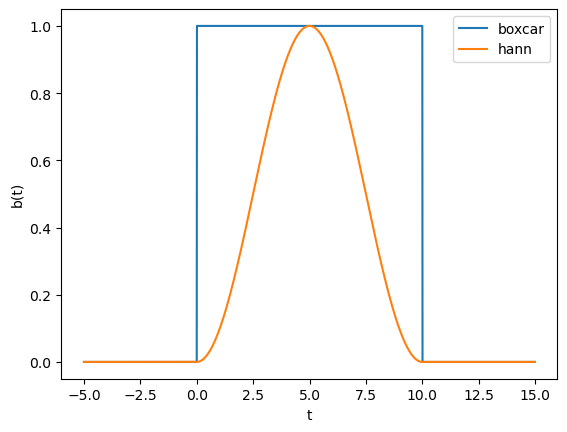

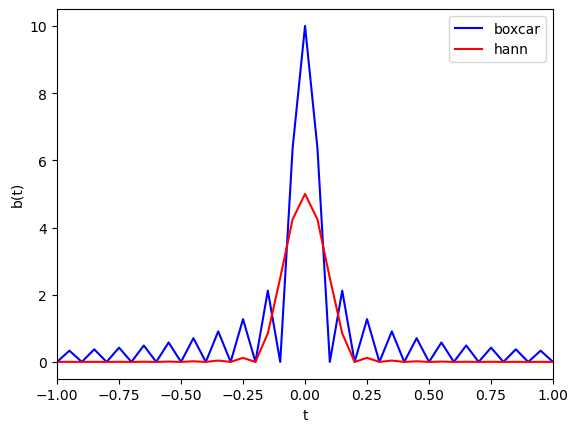

In [289]:
##collaborators q2: none
##part 1
import numpy as np
T=10
dt=0.01
t = np.arange(-5,15,dt)

def b(t): #boxcar
    T=10
    tr=1
    f=0
    bb = np.zeros(2000)
    for i in range(len(t)):
        if 0<=t[i]<=T:
            bb[i]=1
        else:
            bb[i]=0
    return bb

def h(t):
    T=10
    hh = np.zeros(2000)
    for i in range(len(t)):
        if 0<=t[i]<=T:
            hh[i]= 0.5*(1-np.cos(2*np.pi*t[i]/T))
       
    return hh

plt.figure()
plt.plot(t,b(t), label = 'boxcar')
plt.plot(t,h(t), label = 'hann')
plt.legend()
plt.xlabel('t')
plt.ylabel('b(t)')
##part 2

bfft = np.fft.fft(b(t))*dt
hfft = np.fft.fft(h(t))*dt
bfreq = np.fft.fftfreq(len(bfft),dt)
hfreq = np.fft.fftfreq(len(hfft),dt)

#shifting freq for axis
f_axis = np.fft.fftshift( bfreq )
#shift fft
shiftb = np.abs(np.fft.fftshift(bfft))
shifth = np.abs(np.fft.fftshift(hfft))

##part 3

plt.figure()
plt.plot(f_axis, shiftb, 'blue', label = 'boxcar')
plt.plot(f_axis,shifth, 'red', label = 'hann')
plt.xlim(-1,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('b(t)')

part 4:
Truncating makes the frequency 'leak' i.e the amplitudes we see are not exactly what we observe (they are higher in real life).

part 5:
The boxcar function has more noise around the peak signal than the hann window function. The boxcar function gives us an average value to use instead of our original inputs. However, for example if we had a light signal for 5s and wanted to remove the light between 1-2 seconds, we can set that to 0 (in boxcar). The hann window function on the other hand, we can choose to keep the entire light, 50%, 30% etc so it is more useful than the boxcar function because it gives us more range to work with.

In [307]:
import numpy as np
YanData = np.array([
    0.161000, 0.138000, 0.120000, 0.105000, 0.088000, 0.086000, 0.087000, 0.088000,
    0.090000, 0.094000, 0.105000, 0.125000, 0.152000, 0.277000, 0.468000, 1.248000,
    2.391000, 2.604000, 1.725000, 1.160000, 0.904000, 0.761000, 0.640000, 0.626000,
    0.633000, 0.680000, 0.744000, 0.869000, 1.038000, 1.183000, 1.225000, 1.237000,
    1.231000, 1.184000, 1.099000, 1.011000, 0.932000, 0.870000, 0.801000, 0.771000,
    0.871000, 0.961000, 1.026000, 1.075000, 1.102000, 1.107000, 1.087000, 1.064000,
    1.033000, 0.998000, 0.968000, 0.945000, 0.936000, 0.946000, 0.966000, 0.987000,
    1.004000, 1.018000, 1.027000, 1.024000, 1.022000, 1.015000, 1.006000, 0.998000,
    0.997000, 0.996000, 0.996000, 0.995000, 0.995000, 0.995000, 0.995000, 0.996000,
    1.001000, 1.001000, 1.002000, 1.003000, 1.003000, 1.003000, 1.003000, 1.002000,
    1.001000, 1.000000, 1.001000, 1.000000, 0.999000, 0.998000, 0.997000, 0.998000,
    0.998000, 0.999000, 1.000000, 1.000000, 1.001000, 1.001000, 1.001000, 1.001000,
    1.001000, 1.001000, 1.001000, 1.000000, 1.000000, 0.999000, 0.999000, 0.999000,
    1.000000, 0.999000, 0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.002000,
    1.001000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999000,
    0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000
])
dk = 0.12                 # inverse Angstroms
massRho = 1.4273          # grams/cc 
molWeight = 39.948        # grams/mol
Navogadro = 6.0221367e23  # atoms/mol

# Radial Distribution Function (12 pts)

**Background**

Liquids have no fixed internal structure. Yet they do have some short range order in the sense
that they have preferred intermolecular spacings, which are determined by the locations of minima
in the intermolecular potentials. The microscopic structure of liquids is often characterized by a
quantity known as the Radial Distribution Function $g(r)$, which is essentially the probability (Relative
to the average probability, which means that $g(r)$ tends to 1 at large $r$, where the neighbour is too far
away to feel any interaction.) that a molecule has a neighbouring molecule at distance $r$. Typically $g(r)$
shows a value that approaches zero at small $r$ since molecules cannot occupy the same space; it also shows a
peak at the preferred distance of nearest neighbours, and secondary peaks at preferred distances of more distant
neighbours. If a suitable collimated beam of particles (e.g. X-rays or neutrons) is sent through a
sample of the liquid, some of the particles are scattered. The number of particles scattered through
a given angle is related to the Fourier Transform of $g(r)$ evaluated at the wavenumber $k$
corresponding to the transverse momentum transfer associated with that scattering angle. Kittel derives
this relationship in Chapter 17 of Introduction to Solid State Physics.

If this all sounds complicated, all you need to know here is that something called the Structure
Factor $S(k)$ is effectively measured by looking at the scattered intensity as a function of
scattering transverse wavenumber $k$ (proportional to scattering angle), and that the Radial Distribution
Function is related to it by

$$ g(r) = 1 + \frac{1}{2 \pi^2 \rho r} \int_0^\infty k \left( S(k) - 1 \right) \sin(kr) dk $$

where $\rho$ is liquid number density (number of atoms per unit volume, computable from the three
constants mentioned in the introduction), $k$ is wavenumber, and $r$ is radius.

 1. You may have noticed some resemblance between expression (6) and the Fourier transform.
    First show that the integration part $\int_0^\infty k (S(k) - 1) \sin(kr) dk$
    can be rewritten as

    $$p(r) = \int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk.$$
    
    __Hint__: The structure factor S(k) is even, since there should be no reason why scattering intensity would be different for one direction (+k) compared to its opposite (−k). Using the fact that S(k) is even may be useful.  

 2. Now we can make some connections between the Radial Transfer Function and the Fourier
    Transform, if we substitute $r \rightarrow t$ and $k \rightarrow \omega$. What is the Fourier transform
    $P(k)$ of $p(r)$? Is $P(k)$ a real, imaginary or general complex function? Is it even or odd? How will these
    affect $p(r)$? Is that what you expect? Plot $P(k)$ as a function of $k$ ranging from $-15\mathrm{\mathring{A}}^{-1}$ to $15\mathrm{\mathring{A}}^{-1}$
    based on `argon.py` (i.e. import and use the variables defined there).
    
    __Hint__: In constructing $S(k)$ from `argon.py`, you should make an "even" array twice the length (minus 1) of YanData. 
    YanData represents the structure factor (i.e. $S(k)$) for argon sampled at the $dk$ defined in the `argon.py` file. 
	It's specifically $S(k)$ sampled from `k = 0` to `k = len(YanData) * dk`, so create an even function out to the same length in the negative direction (i.e. the "k-axis" it's sampled on would be `-(len(YanData)-1)*dk,  ... 0, ..., + (len(YanData)-1)*dk`).

 3. Write a Python function `[gn, rn] = RDFcalc(S, dk, rho)` to calculate Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.

    __Hint__: for Python `fft()` and `ifft()` functions, realize that the values of the Fourier Transform
    corresponding to negative frequencies are stored in the second half of the arrays given to
    (`ifft`) or obtained from it (`fft`). You also have to study the difference between the DFT and
    FT to multiply the right factors.
 4. With the data provided in `argon.py`, compute the corresponding Radial Distribution Function
    $g(r)$. Plot your results for $r$ from $0$ to $30\mathrm{\mathring{A}}$;. Over what range of radius can you trust your
    result?

    __Hint__: To check if your results make sense, recall that $g(r)$ is related to the probability that a
    molecule has a neighbouring molecule at distance $r$, therefore, should be close to $0$
    when $r \rightarrow 0$, i.e. two molecules can not occupy the same space, and you can
    set $g(r = 0) = 0$. Recall $\lim_{r\rightarrow\infty}g(r)=1$. Also note the unit $\rho$ used in $g(r)$ formula (6).

 5. From the $g(r)$ you computed, estimate the average molecular radius $R_a$ of liquid argon. Give
    your reasoning and state what accuracy you can justify for your estimation.
 6. Now we explore the effect of sampling range. Yan sampled in wavenumber $k$ out to
    $k_{max} = 15.24\mathrm{\mathring{A}}^{-1}$, and he could have saved himself work by not collecting as much data,
    i.e., reducing $k_{max}$. But how much could he have reduced the sampling length $k_{max}$, while still
    seeing distinct peaks in the Radial Distribution Function? Also explain theoretically what you observe.

    __Hint__: Plot on top of the $g(r)$ obtained in Part 4, the $g(r)$'s you compute for a series of
    $k_{max}$ values. You can try half $k_{max}$ each time to look for changes. For the theoretical explanations
    for part 6 and 7, realize the interchangability of $t \leftrightarrow \omega$ ($r \leftrightarrow k$).

 7. To explore the effect of data sampling, let's assume Yan decided to save his work by sampling
    less often (i.e. increasing $dk$). How large a $dk$ can he use to be able to still recover the first
    two peaks clearly? State your answers and a theoretical justification for what you expect to
    see if you increase $dk$ too much.

    __Hint__: Plot on top of the $g(r)$ obtained from `argon.py` data, the $g(r)$'s you obtain when
    you subsample the same dataset. Try doubling $dk$ each time to observe the effect of coarser
    sampling.

collaborators q3: Ryan Cunningham, Zihao Li

## part 1
$sin(kr) = \frac{e^{ikr}-e^{-ikr}}{2i}$
substituting this into the integral we get
$\frac{1}{2i} k(S(k)-1)(e^{ikr}-e^{-ikr})$

However, the limit remains 0 to $\infty$ so to make it to $-\infty$, we note that the function is even and the values at +k and -k are the same so by realizing these are equal, we can omit the $e^{-ikr}$ term and in the end have

$\int^{\infty}_{-\infty} \frac{1}{2i} k(S(k)-1)e^{ikr} \,dk$

Text(0, 0.5, 'P(k)')

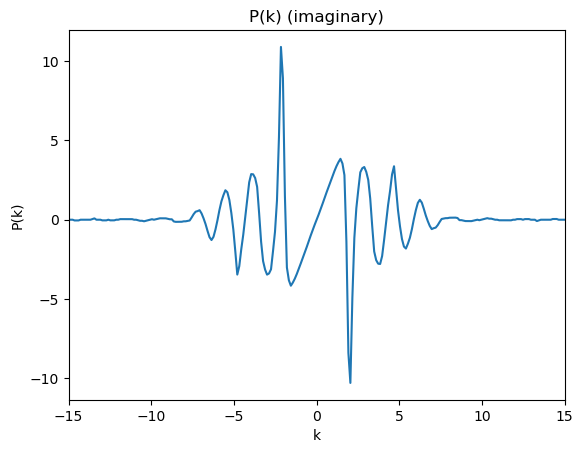

In [308]:
##part2

k = np.arange(-(len(YanData)-1)*dk,(len(YanData)-1)*dk,dk)


nay = np.flip(YanData)
sk = np.concatenate([nay[1:],YanData[:-1]])

P = np.pi/1j * k *(sk-1) # this is (a part of) the fourier transform of p(r)
P=np.imag(P)
plt.plot(k,P)
plt.xlim(-15,15)
plt.title('P(k) (imaginary)')
plt.xlabel('k')
plt.ylabel('P(k)')

##part 2

P(k) is imaginary and it is odd because the original data p(r) is even, so when we transform it, it becomes odd.


In [309]:
##part 3

def RDFcalc(S, dk, rho):
    dr = np.pi/((len(sk)-1)*dk)
    P = np.pi/1j * k *(sk-1)
    
    p = np.fft.ifft(np.fft.fftshift(P))
    
    r = np.arange(0,len(p)*dr,dr)
    
    gn = 1+1/(2*np.pi**2*rho*r)*p
    return gn, r


/tmp/ipykernel_65/7542065.py:11: RuntimeWarning: divide by zero encountered in divide
  gn = 1+1/(2*np.pi**2*rho*r)*p


Text(0.5, 1.0, 'RDF')

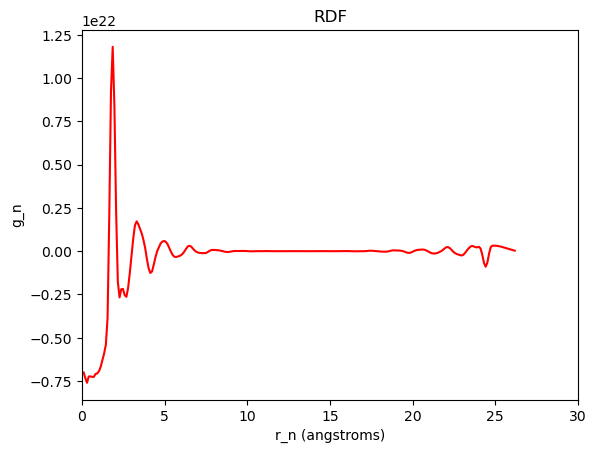

In [310]:
##part 4
rho = massRho*10**(-24)
g,r = (RDFcalc(sk,dk,rho))
plt.plot(r,g, 'red')
plt.xlim(0,30)
plt.xlabel('r_n (angstroms)')
plt.ylabel('g_n')
plt.title('RDF')

we can trust our result until radius is roughly 5 angstroms because thn the molecules are too far away and g(r) is roughly 0 becase there are no interactions between the molecules.

In [294]:
##part 5
gmax = max((g[1:30]))

rmax = np.where(g == gmax)[0][0]
r[18]/2

0.9313021700365001

We found the max index of g and then found the corresponding r. it came to be 1.86. We then divide this by 2 because this is the distance when the 2 molecules are touching i.e 2 radii so we get $r = 0.93$ Angstroms. The accuracy is really high because the atomic radius of argon (according to google) is 0.098nm and 0.93 angstrom = 0.093 nm.

/tmp/ipykernel_65/571203938.py:13: RuntimeWarning: divide by zero encountered in divide
  gn = 1+1/(2*np.pi**2*rho*rn)*p
/tmp/ipykernel_65/571203938.py:13: RuntimeWarning: invalid value encountered in multiply
  gn = 1+1/(2*np.pi**2*rho*rn)*p


Text(0, 0.5, 'g(r)')

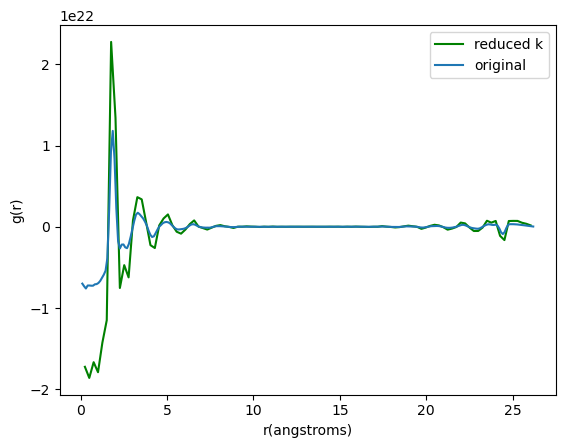

In [295]:
#part 6
remove = 150
kk = k[remove//2:-remove//2]

def RDF(S, dk, rho):
    dr = np.pi/((len(sk)-1)*dk)
    P = np.pi/1j * kk *(sk[remove//2:-remove//2]-1)
    
    p = np.fft.ifft(np.fft.fftshift(P))
    
    rn = np.arange(0,len(p)*dr,dr)*(254/(254-remove))
    
    gn = 1+1/(2*np.pi**2*rho*rn)*p
    return gn, rn
g6,r6 = RDF(sk, dk, rho)
plt.plot(r6,g6, 'green', label = 'reduced k')
plt.plot(r,g, label = 'original')
plt.legend()
plt.xlabel('r(angstroms)')
plt.ylabel('g(r)')

We see distinct peaks up until we remove 150 points from k, with slight variations (higher/lower peak)

/tmp/ipykernel_65/1284655989.py:17: RuntimeWarning: divide by zero encountered in divide
  gn = 1+1/(2*np.pi**2*rho*r)*p


(0.0, 5.0)

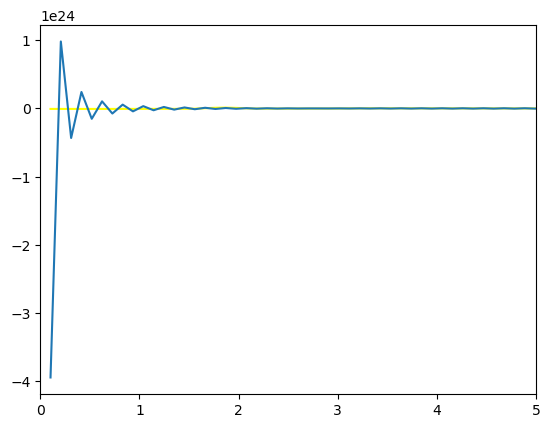

In [297]:
##part 7
dk=0.24
nk = np.arange(-15.24,15.24,dk)
skk = np.empty(127)
for i in range(len(sk)):
    if i%2:
        np.append(skk,sk[i])
        
def calc(S, dk, rho):
    dr = np.pi/((len(S)-1)*dk)
    P = np.pi/1j * nk *(S-1)
    
    p = np.fft.ifft(np.fft.fftshift(P))
    
    r = np.arange(0,len(p)*dr,dr)
    
    gn = 1+1/(2*np.pi**2*rho*r)*p
    return gn, r

newg,newr = calc(skk, dk, rho)
plt.plot(r,g, 'yellow')
plt.plot(newr,newg)
plt.xlim(0,5)